# Load TensorFlow Libary and Keras

In [1]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import pandas as pd

# Load dataset from Keras dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 1us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

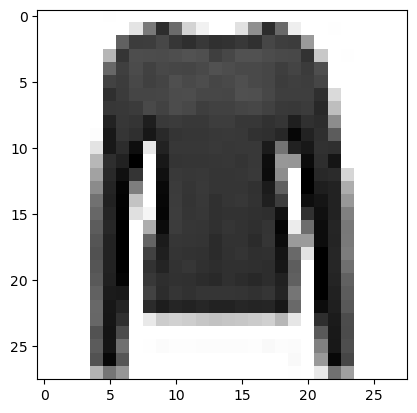

In [20]:
plt.imshow(X_train[50], cmap="binary")
plt.show()

In [21]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [22]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [23]:
class_names[y_train[55]]

'Shirt'

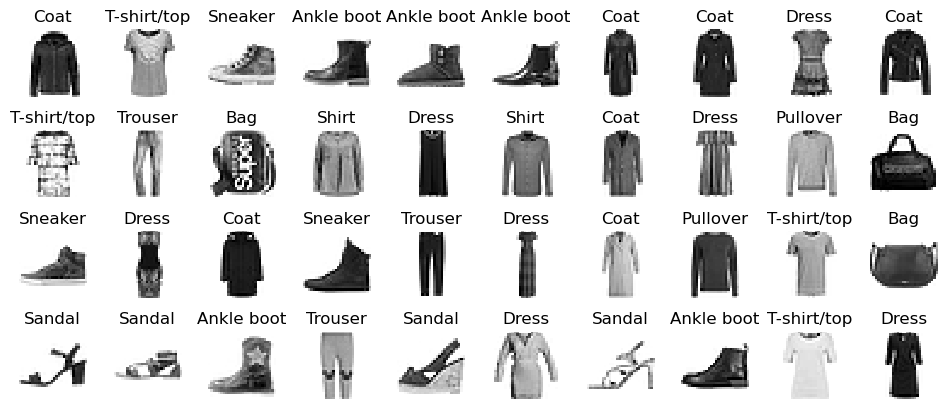

In [24]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Design and build Neural Network to classify the MINST

In [25]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=[28, 28], name="input_layer"))
model.add(keras.layers.Flatten(name="1st_layer_flatten"))
model.add(keras.layers.Dense(200, activation="relu", name="2nd_hidden_layer"))
model.add(keras.layers.Dense(100, activation="relu", name="3nd_hidden_layer"))
model.add(keras.layers.Dense(10, activation="softmax", name="Output_layer"))

In [44]:
# Another way to build the Sequential model
model = keras.models.Sequential([
                                keras.layers.Input(shape=[28, 28], name="input_layer"),
                                keras.layers.Flatten(name="1st_layer_flatten"),
                                keras.layers.Dense(200, activation="relu", name="2nd_hidden_layer"),
                                keras.layers.Dense(100, activation="softmax", name="3nd_hidden_layer"),
                                keras.layers.Dense(10, activation="relu", name="Output_layer"),
])

# Check the model object 

In [45]:
model.layers

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st_layer_flatten (Flatten  (None, 784)               0         
 )                                                               
                                                                 
 2nd_hidden_layer (Dense)    (None, 200)               157000    
                                                                 
 3nd_hidden_layer (Dense)    (None, 100)               20100     
                                                                 
 Output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 178110 (695.74 KB)
Trainable params: 178110 (695.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# Complie the model 

In [48]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# Train the model 

In [49]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 10.4473 - accuracy: 0.0986 - val_loss: 9.0329 - val_accuracy: 0.1112
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 5.2036 - accuracy: 0.0990 - val_loss: 4.6373 - val_accuracy: 0.1112
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 4.7279 - accuracy: 0.0990 - val_loss: 4.5804 - val_accuracy: 0.1112
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 5.0877 - accuracy: 0.1594 - val_loss: 4.9459 - val_accuracy: 0.1982
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 4.9228 - accuracy: 0.1695 - val_loss: 4.7635 - val_accuracy: 0.1188
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 4.8235 - accuracy: 0.1535 - val_loss: 4.9216 - val_accuracy: 0.0936
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 4.8010 - accuracy: 0.1374 - val_loss: 4.7199 - val_accuracy

# Plot the learning curve 

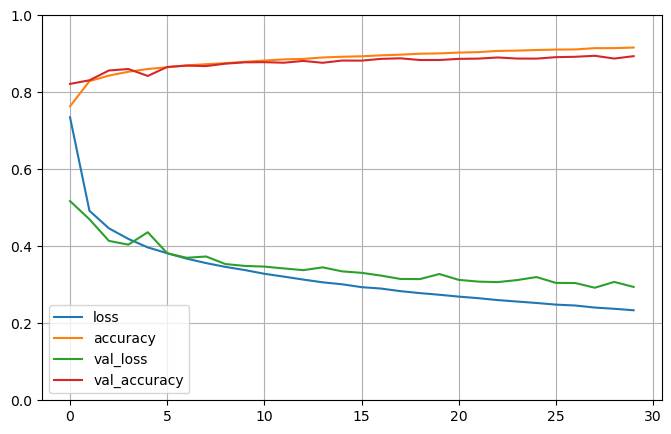

In [32]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [33]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3279 - accuracy: 0.8821


[0.3278959095478058, 0.882099986076355]

In [34]:
y_pred = model.predict(X_test)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[1.6877664e-06, 2.5535735e-07, 4.5057955e-06, ..., 1.3237443e-02,
        1.0119007e-04, 9.8452008e-01],
       [8.0998725e-06, 2.3977129e-10, 9.9972838e-01, ..., 1.0575034e-12,
        1.6720501e-08, 1.1232330e-13],
       [8.9570640e-06, 9.9999022e-01, 6.1833418e-08, ..., 3.9244344e-10,
        3.4672311e-08, 8.6783407e-13],
       ...,
       [2.8949599e-03, 3.0472052e-08, 3.1554600e-04, ..., 2.2942548e-07,
        9.9591112e-01, 1.3497309e-08],
       [2.2339173e-06, 9.9988472e-01, 1.0465758e-06, ..., 1.7569914e-07,
        8.0639586e-07, 1.4594257e-08],
       [2.1114978e-05, 1.4950815e-05, 4.9209670e-04, ..., 7.3599690e-03,
        7.9298910e-04, 1.5345353e-05]], dtype=float32)

In [35]:
y_pred.shape, y_test.shape

((10000, 10), (10000,))

In [36]:
acc = tf.keras.metrics.sparse_categorical_accuracy(y_test, y_pred)

In [37]:
acc.numpy().sum() / acc.numpy().shape[0]

0.8821